In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### 1. 讀入 Fashion MNSIT 數據集

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train[20])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[[  0   0   0   0   0   1   0   0   0  65  99   0   0   0   0   0   0   0
  106  60   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0  17 190 206 202 145 148 146 148 166 165 189
  212 210 202   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 160 229 193 189 197 169 182 109 165 156 202
  198 196 233  96   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2 199 198 213 193 201 207 196 172 211 206 207
  200 202 208 217   0   0   0   0   0   0]
 [  0   0   0   0   0   0 139 205 200 207 190 192 210 210 208 212 208 197
  201 210 206 205  83   0   0   0   0   0]
 [  0   0   0   0   0   2 196 220 200 200 190 193 199 222 222 225 199 198
  210 212 218 227 189   0   0   0   0   0]
 [  0   0   0   0   0   0   0 162 215 199 192 196 195 204 221 200 195 205
  208 218 235 170   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 172 240 192 204 203 206 203 199 206 215
  211 232 114   0   0   0   0   0   0   0]
 [  0   0   0 

這是 Bag


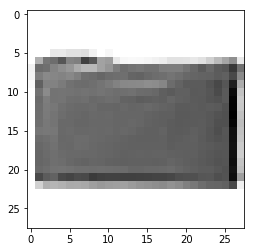

In [6]:
n = 1234
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

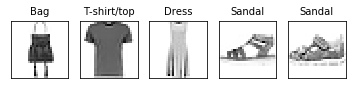

In [7]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

### 2.資料整理

In [8]:
x_train = x_train.reshape(60000,784)/255
x_test = x_test.reshape(10000,784)/255

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 3.打造神經網路

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [12]:
model = Sequential()

In [13]:
model.add(Dense(300, input_dim=784, activation='relu'))

In [14]:
model.add(Dense(300, activation='relu'))

In [15]:
model.add(Dense(300, activation='relu'))

In [16]:
model.add(Dense(300, activation='relu'))

In [17]:
model.add(Dense(10, activation='softmax'))

In [1]:
model.compile(loss='mse',optimizer=SGD(lr=0.087), metrics=['accuracy'] )

NameError: name 'model' is not defined

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3010      
Total params: 509,410
Trainable params: 509,410
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x_train, y_train, batch_size=100, epochs=40)

Train on 60000 samples
Epoch 1/40
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0766 - accuracy: 0.4380
Epoch 2/40
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0439 - accuracy: 0.6998
Epoch 3/40
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0335 - accuracy: 0.7816
Epoch 4/40
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0291 - accuracy: 0.8066
Epoch 5/40
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0268 - accuracy: 0.8200
Epoch 6/40
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0254 - accuracy: 0.8270
Epoch 7/40
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0244 - accuracy: 0.8350
Epoch 8/40
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0236 - accuracy: 0.8398
Epoch 9/40
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0229 - accuracy: 0.8439
Epoch 10/40
60

In [22]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.0188 - accuracy: 0.8718


### 4.成果展示

In [59]:
import random

In [60]:
def answers(list):
    if list[0]==1:
        print('T-shirt/top')
    elif list[1]==1:
        print('Trouser')
    elif list[2]==1:
        print('Pullover')
    elif list[3]==1:
        print('Dress')
    elif list[4]==1:
        print('Coat')
    elif list[5]==1:
        print('Sandal')
    elif list[6]==1:
        print('Shirt')
    elif list[7]==1:
        print('Sneaker')
    elif list[8]==1:
        print('Bag')
    elif list[9]==1:
        print('Ankle boot')

In [61]:
#可看圖片結果的隨機測試

神經網路預測是：
Ankle boot
正確答案是：
Ankle boot


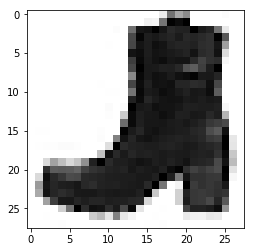

In [64]:
n = random.randint(1,10000)

print('神經網路預測是：', class_names[result[n]],sep = '\n')
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')
print('正確答案是：')
answers(y_test[n])

### 6.改變總結
#### 1. 增加層數
#### 2. 增加訓練次數，並發現成功率增加數隨次數提升而遞減
#### 3.設計一個可直接查看圖片結果的小程式